# CPSC320: Program 2 - Flower Classification Using CNN and Transfer Learning
In this programming assignment, you will build a  CNN Model using Keras to classify images of flowers, visualize intermediate representations and use transfer learning to improve prediction accuracy.

**Important**: The notebook you will submit must be the one you have RUN all the cells  (DO NOT CLEAR OUTPUTS OF ALL CELLS)

In [ ]:
# extract the zip file for the datasets
# !unzip flowers_train_validation.zip

# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Archive:  flowers_train_validation.zip
replace flowers_train_validation/train/daisy/.ipynb_checkpoints/daisy_000004-checkpoint.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
####################################################################################
# This is the Path to the training and validation dataset
# you may need to change the path if your dataset is stored in a different directory
####################################################################################
train_dir = './flowers_train_validation/train'
validation_dir = './flowers_train_validation/validation'
TARGET_SIZE=(150,150)

## 1. CNN Model on Flower Prediction

### 1.1: Data Preparation and Augmentation
We'll use the ImageDataGenerator class to augment our training data and rescale the images. Data augmentation helps in increasing the diversity of the training data, which helps in reducing overfitting.

In [ ]:
# Create ImageDataGenerators for training and validation data
# The train_datagen is used for augmenting the training data with various transformations.
# The validation_datagen is only rescaled, as no augmentation is needed.
# Step 1: Create ImageDataGenerators for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Step 2: Create generators
train_generator = train_datagen.flow_from_directory(
    train_dir,  # This is the target directory
    target_size=TARGET_SIZE,  # All images will be resized to 150x150
    batch_size=32,
    class_mode='categorical'  # Since we use binary classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=TARGET_SIZE,
    batch_size=32,
    class_mode='categorical'
)

Found 3456 images belonging to 5 classes.
Found 865 images belonging to 5 classes.


In [ ]:
# Get the original image shape
original_image_shape = train_generator.image_shape
print("Original image shape:", original_image_shape)

Original image shape: (150, 150, 3)


### 1.2: Building the CNN Model

Now we will build the CNN model using Keras' Sequential API. We'll start by adding convolutional layers followed by max-pooling layers.

### Task 1: Building the CNN Model

You will build the CNN model using Keras' Functional API. You may choose any combination of  convolutional layers followed by max-pooling layers, and finally the classifier layeres. You should pay attention to the followings:
  - Create an input layer that accepts the shape that is as same as the shape from the datagenerator (150,150,3)
  - You final output layer should match the number of classes (5 in our dataset)
- Display model summary

**Note**: It is stronly suggested you build the model using functional API instead of Sequential model.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

#####################################################################
# Build your model (your source code below)
#####################################################################

inputLayer = layers.Input((150, 150, 3))
x = layers.Conv2D(32, (3, 3), activation="relu", padding="valid")(inputLayer)
x = layers.MaxPooling2D((2, 2))(x)
x = layers.Conv2D(64, (3, 3), activation="relu", padding="valid")(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
outputLayer = layers.Dense(5, activation="softmax")(x)

model = models.Model(inputLayer, outputLayer)

model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 82944)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      10,616,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,636,997 (40.58 MB)

 Trainable params: 10,636,997 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

### 1.3: Compiling the Model
The model is compiled using the Adam optimizer and categorical crossentropy loss, which is suitable for multi-class classification problems.

In [ ]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 1.4: Training the Model
We train the model using the training data, and validate it using the validation data to monitor its performance and avoid overfitting.

In [ ]:
# Train the model
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


108/108 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.3368 - loss: 1.8721 - val_accuracy: 0.5110 - val_loss: 1.1381
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 169s 2s/step - accuracy: 0.5143 - loss: 1.1717 - val_accuracy: 0.5306 - val_loss: 1.1146
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 163s 1s/step - accuracy: 0.5868 - loss: 1.0515 - val_accuracy: 0.5688 - val_loss: 1.0378
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.6042 - loss: 0.9897 - val_accuracy: 0.5896 - val_loss: 1.0115
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.6119 - loss: 0.9907 - val_accuracy: 0.6277 - val_loss: 0.8960
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.6507 - loss: 0.9008 - val_accuracy: 0.6231 - val_loss: 0.9187
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6543 - loss: 0.8778 - val_accuracy: 0.6728 - val_loss: 0.8308
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.6764 - loss: 0.8439 - val_accuracy: 0.677

### 1.5: Plot train/valiation loss and accuracy

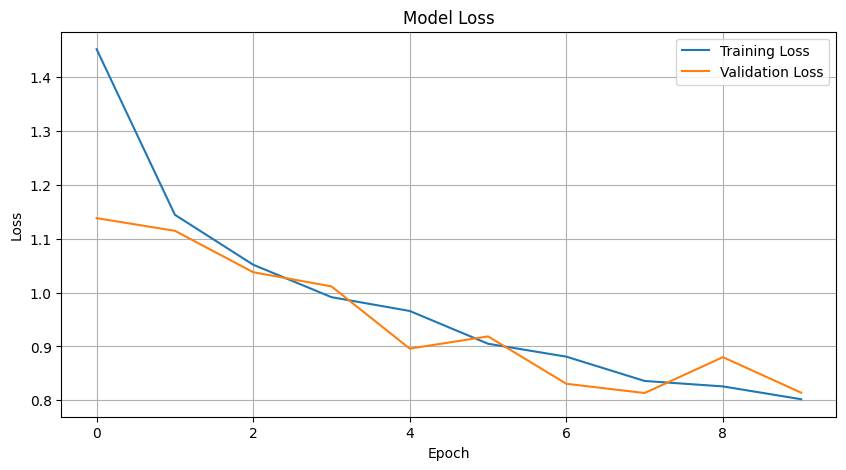

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

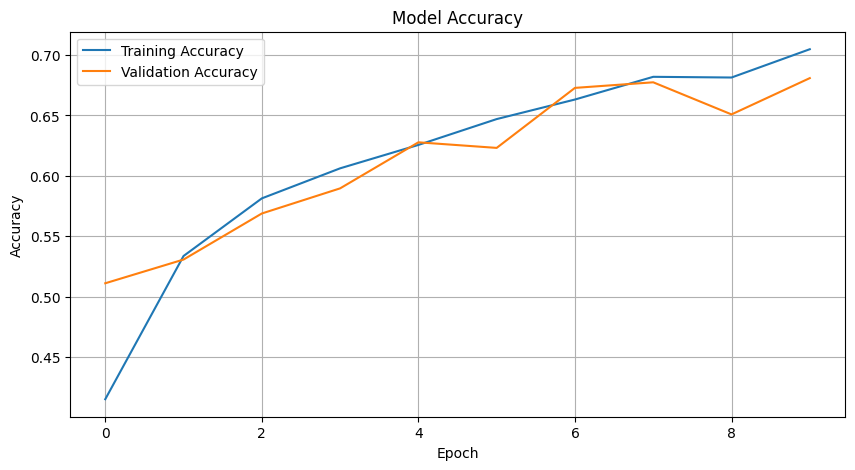

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()

### 1.6: Comparing predicted classes and actual classes

#### 1.6.1 Extract class names

In [ ]:
import os
import numpy as np

'''
Given an data_path that is the folder that contains the folder names, and the folder name are the class names
return the list of class names, stored in np.array (not a list)
'''
def get_classes(data_path):
    CLASSES = [name for name in os.listdir(data_path) if os.path.isdir(os.path.join(data_path, name))]
    CLASSES = np.array(CLASSES)
    return (CLASSES)

CLASSES = get_classes(train_dir)
print(CLASSES)

['rose' 'tulip' 'daisy' 'dandelion' 'sunflower']


### 1.6.2 Predict the first batch of validation

In [ ]:
# Access the first batch of images (x_test) and labels (y_test)
x_test, y_test = validation_generator[0]  # Access the first batch
print("The first batch shapes: ", x_test.shape, y_test.shape)

The first batch shapes:  (32, 150, 150, 3) (32, 5)


In [ ]:
preds = model.predict(x_test)
preds= CLASSES[np.argmax(preds, axis=-1)]
actual = CLASSES[np.argmax(y_test, axis=-1)]

print("The first 10 predicted classes: ", preds[:10])
print("The first 10 actual classes: ", actual[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
The first 10 predicted classes:  ['tulip' 'rose' 'daisy' 'dandelion' 'dandelion' 'sunflower' 'rose' 'rose'
 'rose' 'rose']
The first 10 actual classes:  ['tulip' 'dandelion' 'daisy' 'dandelion' 'tulip' 'sunflower' 'rose' 'rose'
 'sunflower' 'rose']


### Task 2: Compare predicted and actual class

- Understand the following function
- Call the function to visualize the first ten flower images (stored in x_test), and display the predicted labels (stored in preds) and the actual labels (stored in actual) (See the above cell)


In [ ]:
def pred_act_visualization(num, x_test, preds, actuals):
    """
    Visualize the predictions and actual labels of a set of images.

    Parameters:
    - num: Number of images to display.
    - x_test: Array of test images.
    - preds: Array of predicted labels.
    - actuals: Array of actual labels.
    """

    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i in range(num):
        img = x_test[i]
        ax = fig.add_subplot(1, num, i + 1)
        ax.axis("off")
        ax.text(
            0.5,
            -0.35,
            "pred = " + str(preds[i]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.text(
            0.5,
            -0.7,
            "act = " + str(actuals[i]),
            fontsize=10,
            ha="center",
            transform=ax.transAxes,
        )
        ax.imshow(img)


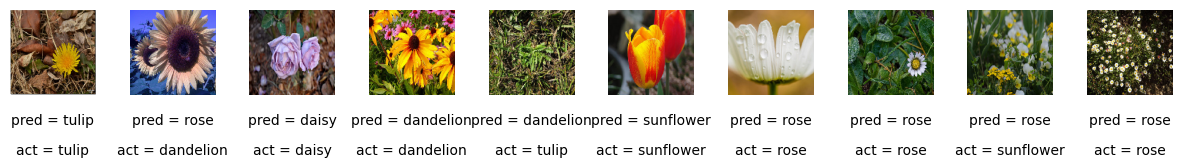

In [ ]:
#########################################################################
# CaLL the the above defined function to visualize the first ten flowers,
# display predicted classes and actual classes (your source code below)
# import necessary libaries if needed
#########################################################################

pred_act_visualization(10, x_test, preds, actual)




## 2. Visualizing Intermediate Representations

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Task 3A: Visualizing Intermediate Representations

- Depending on the model (either Functional API or Sequential ) you build, you may **copy the implemenation of the following functions** from the given example notebooks.
- Be sure to understand each of the copied functions

In [ ]:
# Define visualization model
def define_visualization_model(model):
    successive_outputs = [layer.output for layer in model.layers[1:]]
    visualization_model = tf.keras.models.Model(inputs=model.inputs,
                                                outputs=successive_outputs)

    return visualization_model


In [ ]:
# Preprocess an input image
def preprocess_image(x):
    return x / 255


In [ ]:
# Generate feature maps
def generate_feature_maps(visualization_model, x):
    return visualization_model.predict(x)

In [ ]:
# Normalize and scale feature map slice
def normalize_feature_map(feature_map_slice):
    x = feature_map_slice
    x -= x.mean()  # Subtract the mean
    x /= x.std()   # Divide by the standard deviation
    x *= 64        # Scale by 64
    x += 128       # Shift by 128 to center the values
    x = np.clip(x, 0, 255).astype('uint8')
                   # Clip values to the range [0, 255] and cast to uint8
    return x

In [ ]:
# Visualize feature maps
def visualize_feature_maps(model, successive_feature_maps):
    layer_names = [layer.name for layer in model.layers[1:]]  # Get layer names after the first one
    for layer_name, feature_map in zip(layer_names, successive_feature_maps):
        if len(feature_map.shape) == 4:  # Only process conv/maxpool layers (4D output)
            n_features = feature_map.shape[-1]  # Number of feature maps
            size = feature_map.shape[1]  # Size of each feature map
            display_grid = np.zeros((size, size * n_features))  # Create grid for displaying features

            for i in range(n_features):
                x = normalize_feature_map(feature_map[0, :, :, i])  # Use the normalization function
                display_grid[:, i * size:(i + 1) * size] = x

            scale = 20. / n_features  # Scale factor for visualization
            plt.figure(figsize=(scale * n_features, scale))  # Define the size of the figure
            plt.title(layer_name)  # Title of the plot
            plt.grid(False)  # Remove grid lines
            plt.imshow(display_grid, aspect='auto', cmap='viridis')  # Show the grid with colormap

In [ ]:
# Main process
def main_visualization_process(model, x):
    # Define the model to visualize layers
    visualization_model = define_visualization_model(model)

    # Preprocess the input image (4d dimension)
    x = preprocess_image(x)

    # Get feature maps
    successive_feature_maps = generate_feature_maps(visualization_model, x)

    # Visualize the feature maps
    visualize_feature_maps(model, successive_feature_maps)

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

def prepare_image(data_dir, image_file, target_size=TARGET_SIZE):
    """
    Prepares an image from a given directory by loading it, converting it to an array,
    normalizing it, and reshaping it to match the expected input format of a model.

    Parameters:
    - data_dir: The directory where the image is stored.
    - image_file: The name of the image file (e.g., 'image_file.png').
    - target_size: The target size for the image (default is (150, 150)).

    Returns:
    - x: Numpy array with shape (1, target_size[0], target_size[1], 3).
    """
    # Construct the full image path
    img_path = os.path.join(data_dir, image_file)
    print(f"Image path: {img_path}")

    # Load the image with the specified target size
    img = load_img(img_path, target_size=target_size)

    # Convert the image to a numpy array
    x = img_to_array(img)

    # Reshape the array to add an extra dimension (batch size of 1)
    x = x.reshape((1,) + x.shape)  # Shape becomes (1, 150, 150, 3)

    return x

### Task 3B: Visualizing Intermediate Representations

- Display intermediate representations for the following three images:
    - validation/tulip/tulip_000524.png
    - validation/rose/rose_000231.png
    - validation/daisy/daisy_000182.png
- For each image, you should call the two functions:
    - prepare_image
    - main_visualization_process

Image path: ./flowers_train_validation/validation/tulip/tulip_000524.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


<ipython-input-25-e06d8068dc8a>:5: RuntimeWarning: invalid value encountered in divide
  x /= x.std()   # Divide by the standard deviation
<ipython-input-25-e06d8068dc8a>:8: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


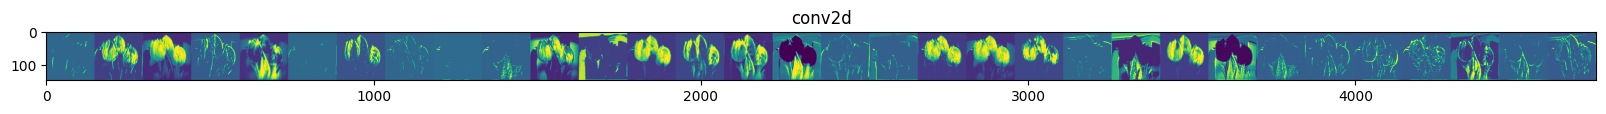

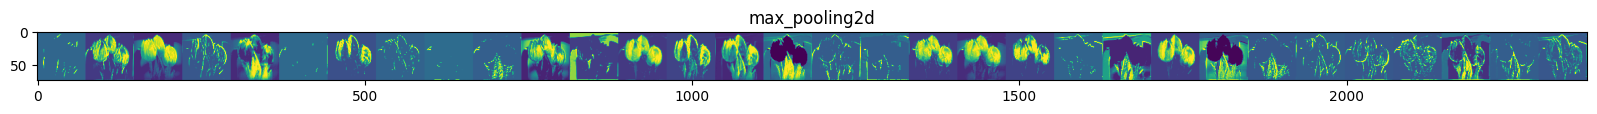

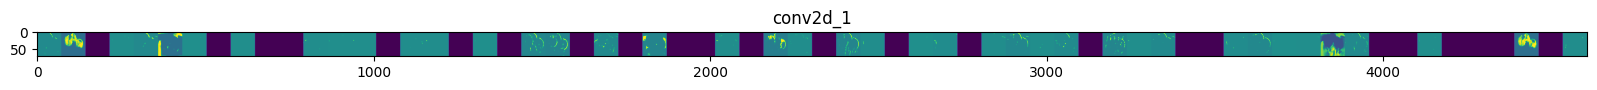

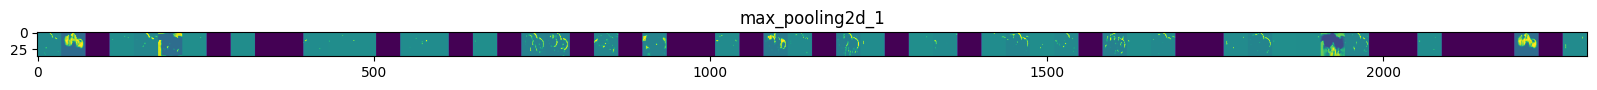

In [ ]:
#####################################################################
# test case 1: tulip image (your source code below)
#####################################################################
x = prepare_image(validation_dir + "/tulip", "tulip_000524.png", TARGET_SIZE)
main_visualization_process(model, x)




Image path: ./flowers_train_validation/validation/rose/rose_000231.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


<ipython-input-25-e06d8068dc8a>:5: RuntimeWarning: invalid value encountered in divide
  x /= x.std()   # Divide by the standard deviation
<ipython-input-25-e06d8068dc8a>:8: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


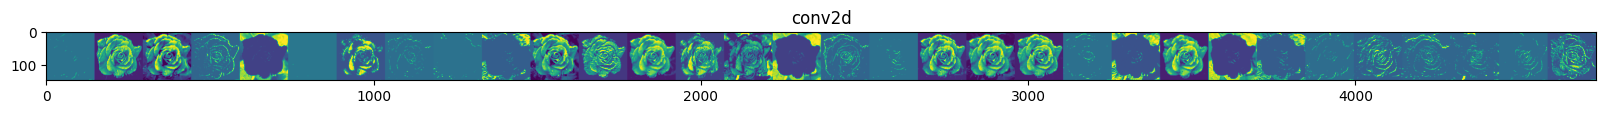

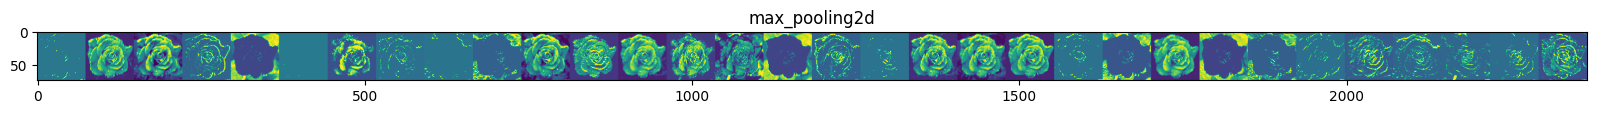

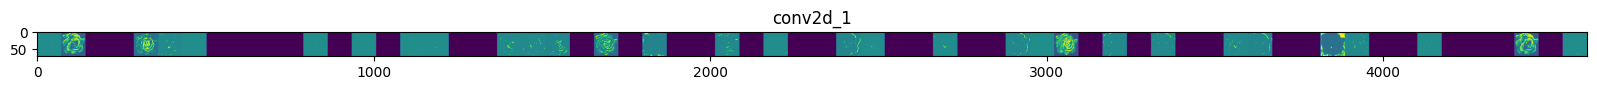

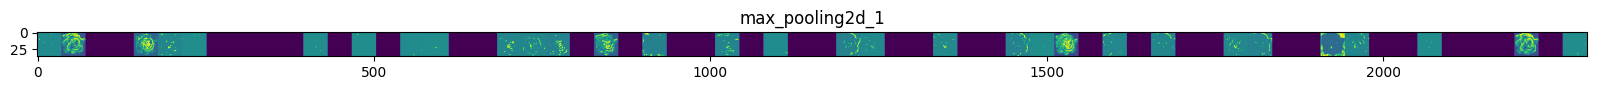

In [ ]:
#####################################################################
# test case 2: rose image (your source code below)
#####################################################################

x = prepare_image(validation_dir + "/rose", "rose_000231.png", TARGET_SIZE)
main_visualization_process(model, x)




Image path: ./flowers_train_validation/validation/daisy/daisy_000182.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


<ipython-input-25-e06d8068dc8a>:5: RuntimeWarning: invalid value encountered in divide
  x /= x.std()   # Divide by the standard deviation
<ipython-input-25-e06d8068dc8a>:8: RuntimeWarning: invalid value encountered in cast
  x = np.clip(x, 0, 255).astype('uint8')


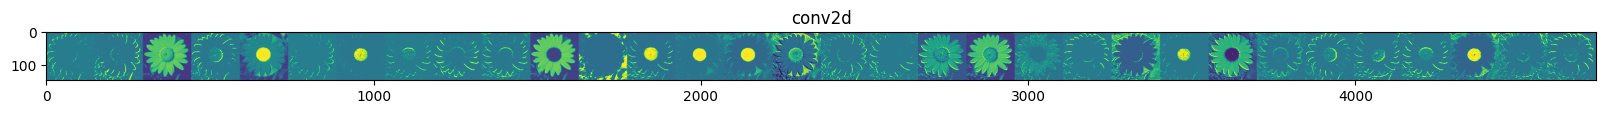

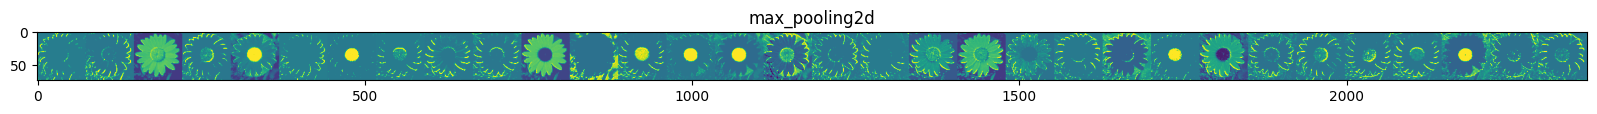

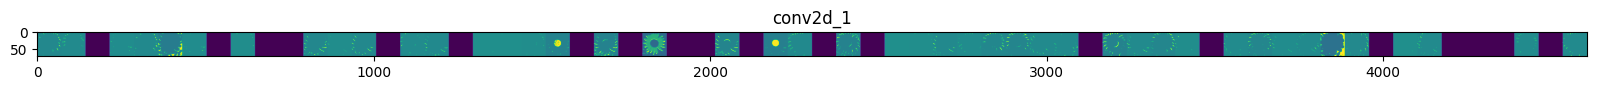

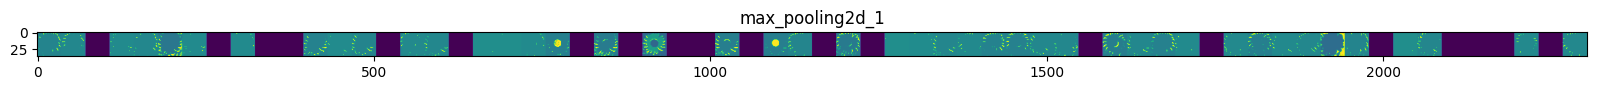

In [ ]:
#####################################################################
# test case 3: daisy image (your source code below)
#####################################################################

x = prepare_image(validation_dir + "/daisy", "daisy_000182.png", TARGET_SIZE)
main_visualization_process(model, x)




## 3. Transfer Learning

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

### Task 4: Building the Transfer Learning based CNN Model

You will use the functional API to build transfer learning based CNN model as follows:  
- Load the VGG16 model, exclude the top (fully connected) layers
- Freeze the convolutional layers of the VGG16 model
- Add new top layers for flower classification
    - GlobalAveragePooling2D() layer
    - Dense layer with 'relu' activation
    - Drop layer
    - Softmax layer
- Display model summary

In [ ]:
#####################################################################
# Build your model (your source code below)
#####################################################################

# inputLayer = layers.Input((150, 150, 3))
# x = layers.Conv2D(32, (3, 3), activation="relu", padding="valid")(inputLayer)
# x = layers.MaxPooling2D((2, 2))(x)
# x = layers.Conv2D(64, (3, 3), activation="relu", padding="valid")(x)
# x = layers.MaxPooling2D((2, 2))(x)

# x = layers.Flatten()(x)
# x = layers.Dense(128, activation="relu")(x)
# outputLayer = layers.Dense(5, activation="softmax")(x)

# model = models.Model(inputLayer, outputLayer)

# model.summary()

baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(150, 150, 3))

for layer in baseModel.layers:
  layer.trainable = False

x = baseModel.output

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(1024, activation="relu")(x)
x = layers.Dropout(rate=0)(x)
transOutput = layers.Dense(5, activation="softmax")(x)

transfer_model = models.Model(baseModel.input, transOutput)


In [ ]:
transfer_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)          │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_12          │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1024)                │         525,3

 Total params: 15,245,125 (58.16 MB)

 Trainable params: 530,437 (2.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# Compile the model
transfer_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model using your dataset
# Warning: It might take a couple of hours to run your own CPU

transfer_history = transfer_model.fit(train_generator, validation_data=validation_generator, epochs=10)

Epoch 1/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1160s 11s/step - accuracy: 0.3767 - loss: 1.4892 - val_accuracy: 0.5931 - val_loss: 1.1768
Epoch 2/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1138s 10s/step - accuracy: 0.6353 - loss: 1.0999 - val_accuracy: 0.6532 - val_loss: 0.9953
Epoch 3/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1123s 10s/step - accuracy: 0.6830 - loss: 0.9372 - val_accuracy: 0.6890 - val_loss: 0.8971
Epoch 4/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1158s 10s/step - accuracy: 0.6923 - loss: 0.8658 - val_accuracy: 0.7133 - val_loss: 0.8420
Epoch 5/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1115s 10s/step - accuracy: 0.7272 - loss: 0.7913 - val_accuracy: 0.7237 - val_loss: 0.7963
Epoch 6/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1126s 10s/step - accuracy: 0.7386 - loss: 0.7571 - val_accuracy: 0.7306 - val_loss: 0.7756
Epoch 7/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1150s 11s/step - accuracy: 0.7474 - loss: 0.7110 - val_accuracy: 0.7491 - val_loss: 0.7475
Epoch 8/10
108/108 ━━━━━━━━━━━━━━━━━━━━ 1140s 11s/step - accuracy: 0.7283 - loss: 0

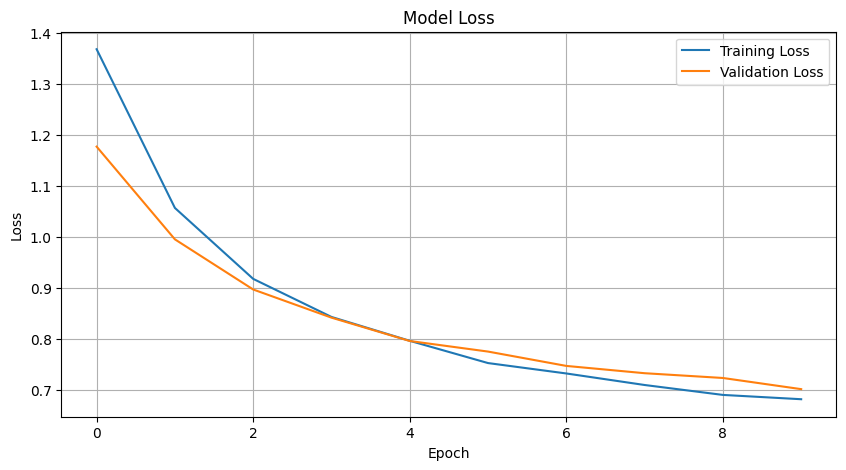

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(transfer_history.history['loss'], label='Training Loss')
plt.plot(transfer_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()


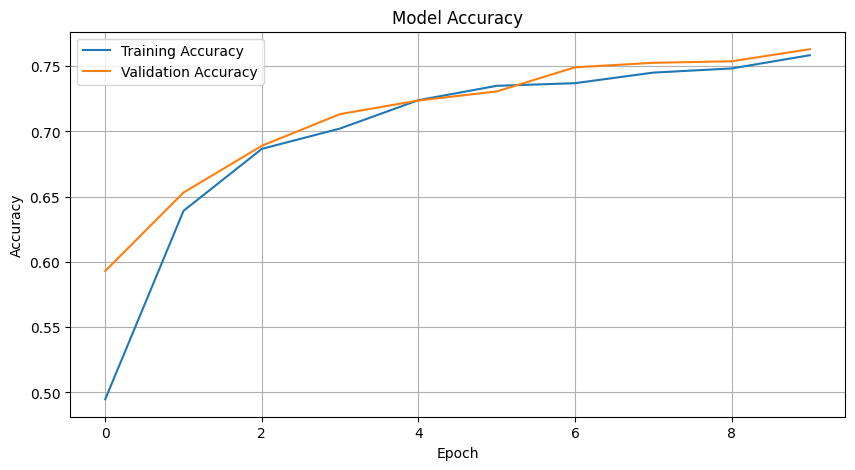

In [ ]:
# Plot the training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(transfer_history.history['accuracy'], label='Training Accuracy')
plt.plot(transfer_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()
plt.show()